In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
filtered_df = pd.read_csv("filtered_df.csv")

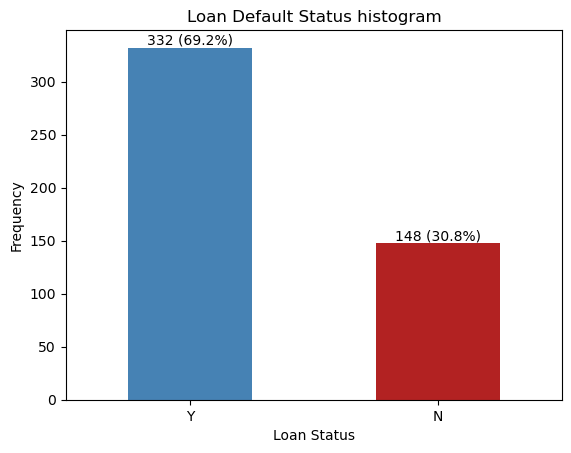

In [9]:
# There is a total of 332 defaults
count_classes = filtered_df['Loan_Status'].value_counts()
percentage = (count_classes / count_classes.sum()) * 100

# Define color palette
colors = ['steelblue', 'firebrick']

ax = count_classes.plot(kind='bar', rot=0, color=colors)
ax.set_title("Loan Default Status histogram")
ax.set_xlabel("Loan Status")
ax.set_ylabel("Frequency")

# Add percentage labels to each bar
for i, v in enumerate(count_classes):
    ax.text(i, v, f"{v} ({percentage[i]:.1f}%)", ha='center', va='bottom')

plt.show()

In [11]:
#what percentae 
# Group by 'sex' and 'married', and count 'default' occurrences
result = filtered_df.groupby(['Gender', 'Married']).agg(total_default=('Loan_Status', lambda x: (x == 'N').sum())).reset_index()
# Calculate the total defaults for all groups
total_defaults = result['total_default'].sum()
# Calculate the percentage of defaults for each group
result['percentage'] = round(result['total_default'] / total_defaults * 100, 2)
result

,Gender,Married,total_default,percentage
0,Female,No,24,16.22
1,Female,Yes,8,5.41
2,Male,No,40,27.03
3,Male,Yes,76,51.35
